In [2]:
# Importing required libraries and dependencies 
import pandas as pd
import datetime as dt 
import numpy as np
from prophet import Prophet 
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot

In [3]:
private_sector_df = pd.read_csv("../Resources/privatesector_Data.csv", delimiter=';').dropna()
economy_df = pd.read_csv("../Resources/Economy_Data.csv", delimiter=';').dropna()
health_poverty_df = pd.read_csv("../Resources/HealthAndpoverty_Data.csv", delimiter=';').dropna()
education_environment_df = pd.read_csv("../Resources/EducationAndEnviron_Data.csv", delimiter=';').dropna()
public_sector_indicators_df = pd.read_csv("../Resources/PublicSector_Indicators.csv", delimiter=';').dropna()

display(private_sector_df.head())
display(economy_df.head())
display(health_poverty_df.head())
display(education_environment_df.head())
display(public_sector_indicators_df.head())


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,1.189510e+01
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,1970.0,5.556494e+00
5,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,1.851044e+00
7,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,India,IND,1970.0,9.207277e+00
64,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,South Africa,ZAF,1970.0,5.739998e+08


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
10,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Brazil,BRA,1970.0,3.786021e+10
11,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,China,CHN,1970.0,8.525561e+10
12,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,India,IND,1970.0,5.776720e+10


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970.0,77.1184
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,1970.0,38.6866
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,1970.0,108.3178
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,1970.0,29.8818
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,1970.0,93.7106


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970.0,67.669150
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970.0,68.242070
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970.0,67.096420
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970.0,23.378048
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970.0,39.900940


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
20,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,1970.0,1.641000e+02
22,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,India,IND,1970.0,9.630000e+01
24,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,South Africa,ZAF,1970.0,5.680000e+01
25,"Air transport, passengers carried",IS.AIR.PSGR,Brazil,BRA,1970.0,3.339800e+06
27,"Air transport, passengers carried",IS.AIR.PSGR,India,IND,1970.0,2.671600e+06


In [4]:
year = 2008
private_sector_df = private_sector_df.loc[private_sector_df["Year"] > year].reset_index(drop=True)
economy_df = economy_df.loc[economy_df["Year"] > year].reset_index(drop=True)
health_poverty_df = health_poverty_df.loc[health_poverty_df["Year"] > year].reset_index(drop=True)
education_environment_df = education_environment_df.loc[education_environment_df["Year"] > year].reset_index(drop=True)
public_sector_indicators_df = public_sector_indicators_df.loc[public_sector_indicators_df["Year"] > year].reset_index(drop=True)

display(private_sector_df.head())
display(economy_df.head())
display(health_poverty_df.head())
display(education_environment_df.head())
display(public_sector_indicators_df.head())

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,2009.0,0.448398
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,2009.0,1.164823
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,2009.0,2.301575
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,2009.0,1.922157


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,2009.0,68.3124
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,2009.0,7.3248
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,2009.0,37.9562
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,2009.0,28.3538
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,2009.0,69.1452


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,2009.0,93.27
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,2009.0,54.07
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,2009.0,32.82
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,2009.0,96.93
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,2009.0,75.04


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,Brazil,BRA,2009.0,47.538288
1,Adequacy of social protection and labor progra...,per_allsp.adq_pop_tot,Brazil,BRA,2009.0,40.970682
2,Adequacy of social safety net programs (% of t...,per_sa_allsa.adq_pop_tot,Brazil,BRA,2009.0,9.425445
3,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,2009.0,1782.300000
4,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,China,CHN,2009.0,11976.438000


In [5]:
private_sector_df.rename(columns={"SeriesName":"SeriesName_Private", "SeriesCode":"SeriesCode_Private", "Value":"Value_Private"}, inplace=True)
private_sector_df.head()

,SeriesName_Private,SeriesCode_Private,CountryName,CountryCode,Year,Value_Private
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,2009.0,0.448398
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,2009.0,1.164823
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,2009.0,2.301575
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,2009.0,1.922157


In [ ]:
econ_carbon = economy_df[economy_df['SeriesCode_Econ']=='Adjusted savings: carbon dioxide damage (current US$)']

In [6]:
economy_df.rename(columns={"SeriesName":"SeriesName_Econ", "SeriesCode":"SeriesCode_Econ", "Value":"Value_Econ"}, inplace=True)
economy_df.head()

,SeriesName_Econ,SeriesCode_Econ,CountryName,CountryCode,Year,Value_Econ
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


In [7]:
economy_df['SeriesName_Econ'].unique()

array(['Adjusted net national income (annual % growth)',
       'Adjusted net national income (constant 2010 US$)',
       'Adjusted net national income (current US$)',
       'Adjusted net national income per capita (annual % growth)',
       'Adjusted net national income per capita (constant 2010 US$)',
       'Adjusted net national income per capita (current US$)',
       'Adjusted net savings, excluding particulate emission damage (% of GNI)',
       'Adjusted net savings, excluding particulate emission damage (current US$)',
       'Adjusted net savings, including particulate emission damage (% of GNI)',
       'Adjusted net savings, including particulate emission damage (current US$)',
       'Adjusted savings: carbon dioxide damage (% of GNI)',
       'Adjusted savings: carbon dioxide damage (current US$)',
       'Adjusted savings: consumption of fixed capital (% of GNI)',
       'Adjusted savings: consumption of fixed capital (current US$)',
       'Adjusted savings: education

In [8]:
master_brics_df = pd.merge(private_sector_df, economy_df, on=["CountryName","CountryCode", "Year"], how="inner")
master_brics_df.head()

,SeriesName_Private,SeriesCode_Private,CountryName,CountryCode,Year,Value_Private,SeriesName_Econ,SeriesCode_Econ,Value_Econ
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,5.421578e+00
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,1.739579e+12
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,1.410360e+12
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854,Adjusted net national income per capita (annua...,NY.ADJ.NNTY.PC.KD.ZG,4.412339e+00
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854,Adjusted net national income per capita (const...,NY.ADJ.NNTY.PC.KD,8.972153e+03


In [9]:
master_brics_df[['Value_Private', 'Value_Econ']].corr()

,Value_Private,Value_Econ
Value_Private,1.000000,0.007814
Value_Econ,0.007814,1.000000


<Axes: xlabel='Value_Private', ylabel='Value_Econ'>

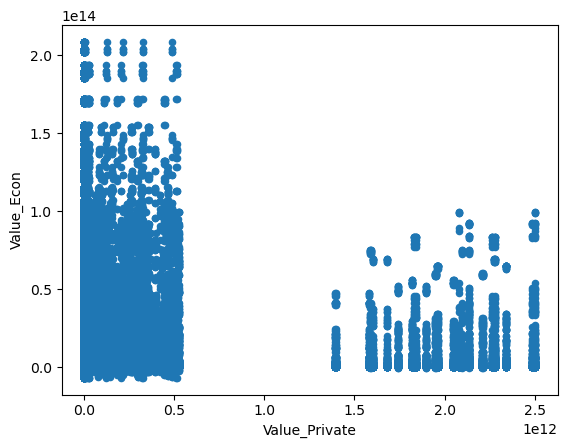

In [38]:
master_brics_df[['Value_Private', 'Value_Econ']].plot(kind='scatter', x='Value_Private', y='Value_Econ')

In [39]:
master_brics_df.groupby("CountryName").mean()

In [20]:
master_brics_df = pd.concat([private_sector_df, economy_df, health_poverty_df, education_environment_df, public_sector_indicators_df], axis=0)
display(master_brics_df.head(10))
display(master_brics_df.tail(10))

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2010.0,3.851848
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,2010.0,0.456645
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,2010.0,2.006039
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,2010.0,2.071819
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,2010.0,1.774643
5,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,Brazil,BRA,2010.0,1.307032
6,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,China,CHN,2010.0,3.718186
7,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,India,IND,2010.0,1.776210
8,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,Russian Federation,RUS,2010.0,0.958036
9,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,South Africa,ZAF,2010.0,0.962295


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
9350,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,Brazil,BRA,2019.0,63.053001
9351,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,China,CHN,2019.0,55.485001
9352,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,India,IND,2019.0,23.797001
9353,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,Russian Federation,RUS,2019.0,92.210999
9354,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,South Africa,ZAF,2019.0,82.084000
9355,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Brazil,BRA,2019.0,67.289001
9356,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,China,CHN,2019.0,53.251999
9357,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,India,IND,2019.0,23.715000
9358,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Russian Federation,RUS,2019.0,93.209999
9359,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,South Africa,ZAF,2019.0,84.447998


In [29]:

economy_df.head(30)
#economy_groups =  economy_df.groupby(["SeriesName","CountryCode"])
#display(economy_groups.size())



,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2010.0,5.119341e+00
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2010.0,9.410696e+00
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2010.0,1.008856e+01
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2010.0,1.178521e+01
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2010.0,3.931949e+00
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,2010.0,1.828634e+12
6,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,China,CHN,2010.0,4.498519e+12
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,2010.0,1.446575e+12
8,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Russian Federation,RUS,2010.0,1.201073e+12
9,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,South Africa,ZAF,2010.0,3.016100e+11
